# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
previsao_de_renda = pd.read_csv('/content/previsao_de_renda.csv')

In [3]:
previsao_de_renda = pd.DataFrame(previsao_de_renda)

In [4]:
previsao_de_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [5]:
previsao_de_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

**Variável qualitaiva: Sexo**

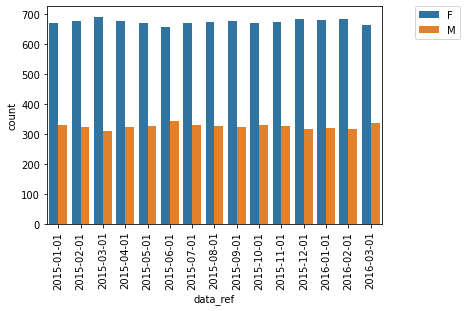

In [6]:
ax = sns.countplot(x='data_ref', hue = 'sexo', data=previsao_de_renda)

tick_labs = previsao_de_renda['data_ref'].unique()

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)


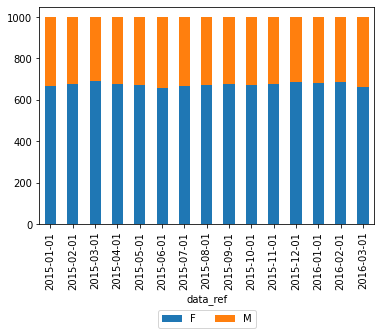

In [7]:
tab = pd.crosstab(previsao_de_renda['data_ref'], previsao_de_renda['sexo'])
tab.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

tick_labs = previsao_de_renda['data_ref'].unique()

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50), ncol = 3)

As duas visão mostra que ao longo do tempo a varíavel 'sexo' tem um oscilação pequena.

**Variável: Posse de veículo**

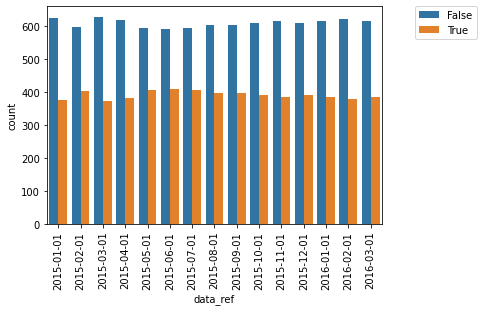

In [8]:
ax = sns.countplot(x='data_ref', hue = 'posse_de_veiculo', data=previsao_de_renda)

tick_labs = previsao_de_renda['data_ref'].unique()

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)

Para janeiro, março e abril, uma quantidade menor que o período, porém para os outros meses pouca oscilação.

**Variável: Posse de imóvel**

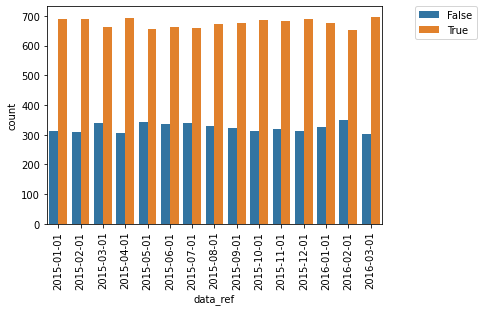

In [9]:
ax = sns.countplot(x='data_ref', hue = 'posse_de_imovel', data=previsao_de_renda)

tick_labs = previsao_de_renda['data_ref'].unique()

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)

As oscilações atenuam um pouco: em março, maio, junho e julho de 2015, assim como fevereiro de 2016. vemos uma quantidade menor de pessoas que possuem imóveis, para os outro meses as oscilações são menores, porém como dito no começo, entendo não ser uma oscilação grande quando olhamos o período como um todo.

**Variável: Tipo de Renda**

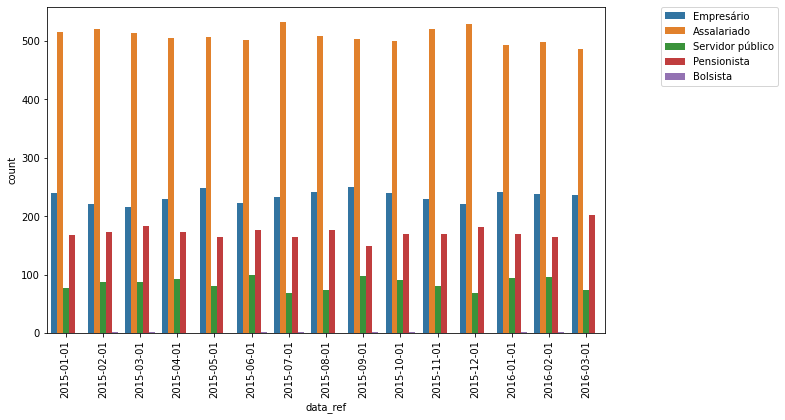

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='data_ref', hue = 'tipo_renda', data=previsao_de_renda)

tick_labs = previsao_de_renda['data_ref'].unique()

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)

Para tipo de Renda, as quantidades gerais não se alteram ao longo do tempo. Acontecem oscilações como, por exemplo: 

*   Empresário, de 220 a 250 durante o período.
*   Assalariados de 500 a 550.
*   Servidor público de 80 a 100.
*   Pensionistas de 150 a 200.

Sendo assim, as variação não passam de 50 em quantidade;





**Variável: Tipo de Residência**

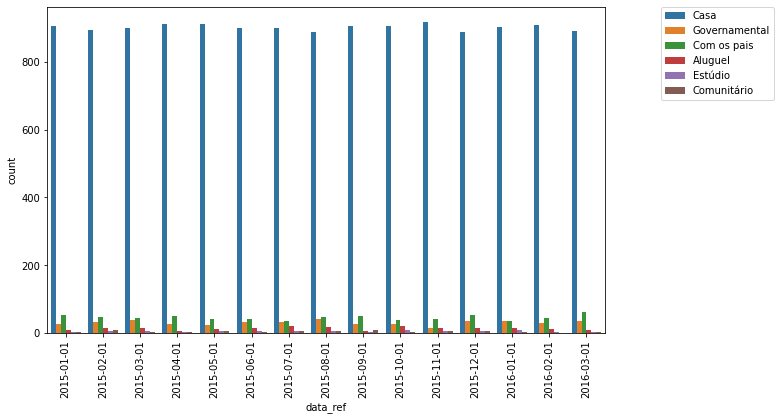

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='data_ref', hue = 'tipo_residencia', data=previsao_de_renda)

tick_labs = previsao_de_renda['data_ref'].unique()

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)

Para tipo de residência, podemos considerar que o resulta é basicamente similar ao longo do tempo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

**Variável qualitaiva: Sexo**

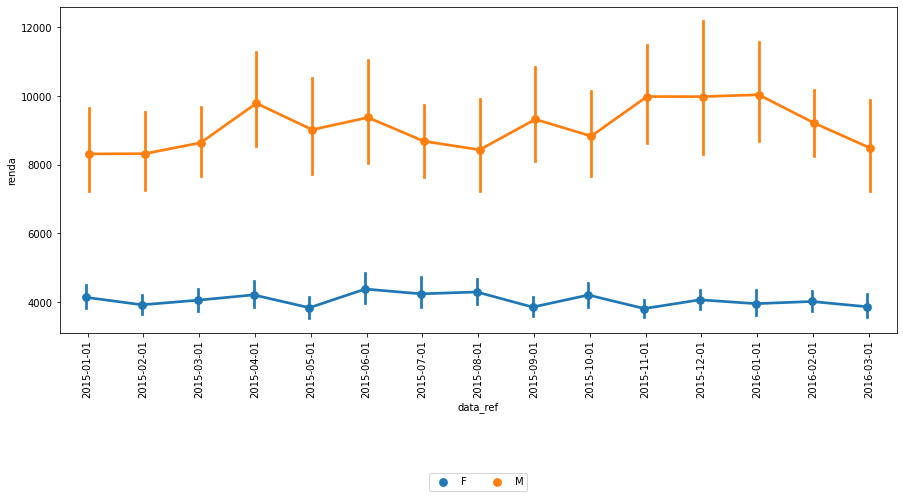

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.pointplot(x='data_ref', y='renda', hue='sexo',
                   data=previsao_de_renda, dodge=True, ci=95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30), ncol = 3)

tick_labs = previsao_de_renda['data_ref'].unique()

labels = ax.set_xticklabels(tick_labs, rotation=90)

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50), ncol = 3)

A variável sexo, de acordo com o tempo e tendo como base a renda, mostra uma estabilidade muito boa. Mostrando que a variável pode ser usada como modelo.

Para o Sexo Feminino, a variação é muito pequena. 
Para o Sexo Masculino, a variaão é um pouco maior, porém está dentro de 8mil até 10mil. 

**Variável: Posse de veículo**

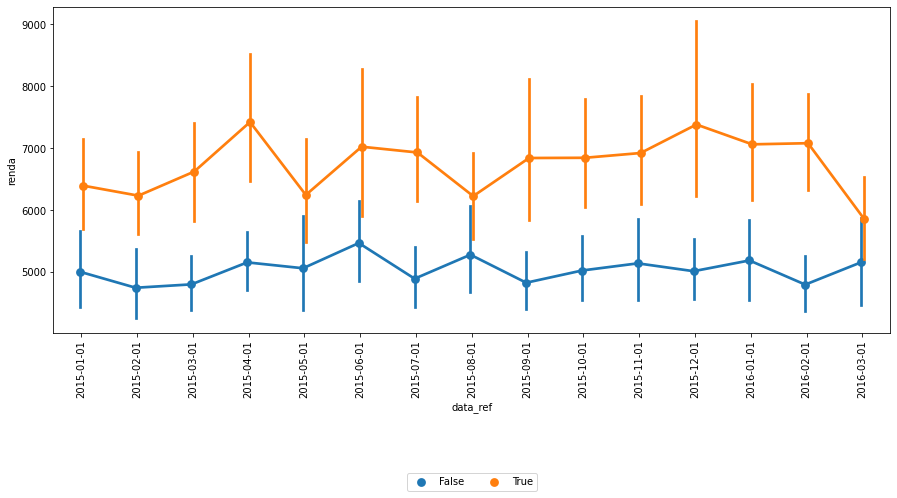

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.pointplot(x='data_ref', y='renda', hue='posse_de_veiculo',
                   data=previsao_de_renda, dodge=True, ci=95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30), ncol = 3)

tick_labs = previsao_de_renda['data_ref'].unique()

labels = ax.set_xticklabels(tick_labs, rotation=90)

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50), ncol = 3)

A variável posse de veículo, de acordo com o tempo e tendo como base a renda, mostra uma estabilidade boa. Mostrando que a variável pode ser usada como modelo.

Para as pessoas que não possuem veículos "false", as variações ao longo do tempo estão dentro de 4 a 6mil. 

Para as pessoas que possuem veículos "True", a variação de renda é maior. com boas variações de 6 a 7,5mil.
Tendo também, um amplo range de viariação nos meses de junho e setembro de 2015 e a maior em dezembro de 2015.

**Variável: Posse de imóvel**

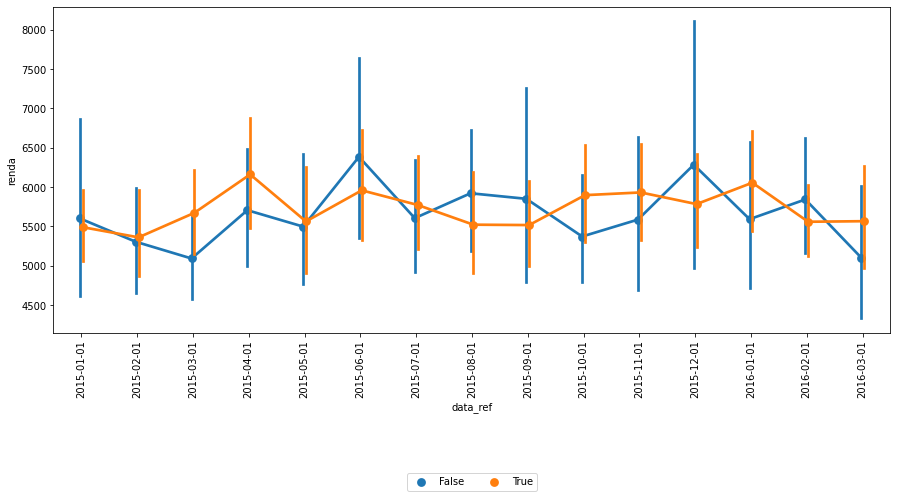

In [20]:
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.pointplot(x='data_ref', y='renda', hue='posse_de_imovel',
                   data=previsao_de_renda, dodge=True, ci=95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30), ncol = 3)

tick_labs = previsao_de_renda['data_ref'].unique()

labels = ax.set_xticklabels(tick_labs, rotation=90)

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50), ncol = 3)

A variável posse de imóvel, de acordo com o tempo e tendo como base a renda, mostra uma estabilidade também boa. Mostrando que a variável pode ser usada como modelo.

Para as pessoas que tem e que não tem imóvel, as variações médias de renda estão entre 5 e 6,5mil. 

Porém, as variações ao longo do tempo, mostram uma grande variancia dentro dos meses de janeiro, julho, setembro e dezembro. Para as pessoas que não possuem imóvel.

**Variável: Tipo de Renda**

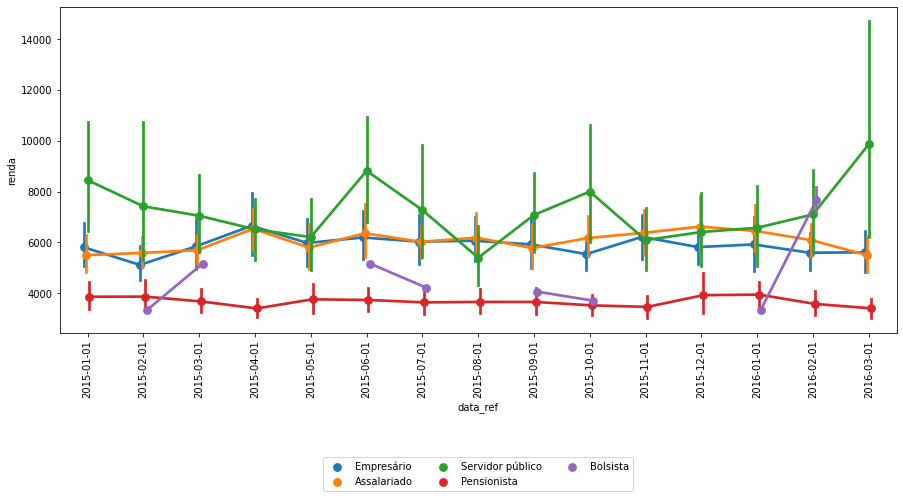

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.pointplot(x='data_ref', y='renda', hue='tipo_renda',
                   data=previsao_de_renda, dodge=True, ci=95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30), ncol = 3)

tick_labs = previsao_de_renda['data_ref'].unique()

labels = ax.set_xticklabels(tick_labs, rotation=90)

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50), ncol = 3)

A variável tipo de renda, de acordo com o tempo e tendo como base a renda, mostra uma estabilidade também boa. Mostrando que a variável pode ser usada como modelo.

Para pensionista, assalariado e empresários as variações ao longo do tempo são baixas. 
Os bolsistas não tem dados em todos os meses, o que dificulta um pouco.
já Servidores Públicos, entendo que, a varição média é grande e também a variancia por mês é grande. 

**Variável: Tipo de Residência**

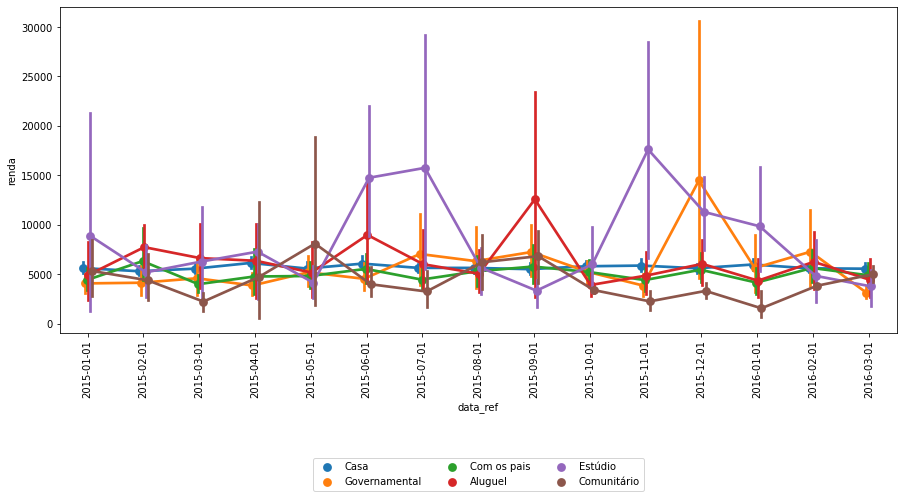

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.pointplot(x='data_ref', y='renda', hue='tipo_residencia',
                   data=previsao_de_renda, dodge=True, ci=95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30), ncol = 3)

tick_labs = previsao_de_renda['data_ref'].unique()

labels = ax.set_xticklabels(tick_labs, rotation=90)

ticks = ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50), ncol = 3)

A variável tipo de residencia, de acordo com o tempo e tendo como base a renda, mostra uma estabilidade também boa. Mostrando que a variável pode ser usada como modelo.

É um cenário parecido com o da variável tipo de renda, pouca variaão para a maioria dos casos. Como por exemplo, Casa, Governamental, Com os pais, Aluguel e Comunitário.

Estudio é a variável que mais apresentou variações de renda. 